<a href="https://colab.research.google.com/github/GresiaARS/ForecastingSales_ARIMAModel/blob/main/Final_Skripsi_Full.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd, io

Di tahap ini tuh perlu ada preprocessing transformasi kolom, jadi si kategori jadi kolom. Raw nya tetap SellerX_ARIMASkrpsi.csv, nah dia di transform ke bentuk tengah_malam_skripsi.

In [ ]:
# Membaca data Anda (pastikan data Anda sudah dalam format yang sesuai)
df = pd.read_csv('/content/Data Skripsi Final - data_collab (1).csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5196 entries, 0 to 5195
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            5196 non-null   object 
 1   product_title   5196 non-null   object 
 2   category        5196 non-null   object 
 3   qty             5196 non-null   int64  
 4   price           5196 non-null   int64  
 5   revenue         5196 non-null   int64  
 6   rating_product  5196 non-null   float64
 7   seller_name     5196 non-null   object 
 8   marketplace     5196 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 365.5+ KB


In [ ]:
df

,date,product_title,category,qty,price,revenue,rating_product,seller_name,marketplace
0,2021-11-01,ALCHEMIST - EAU DE PARFUM,Parfum & Wewangian,5,199000,995000,4.91,Rollover Reaction Official Shop,Shopee
1,2021-11-06,Cushion Compact Tinted Moisturizer - Rollover ...,Foundation,38,69000,2622000,4.95,Rollover Reaction Official Shop,Shopee
2,2021-11-06,Refill Cushion Compact Tinted Moisturizer - Ro...,Foundation,29,59000,1711000,4.95,Rollover Reaction Official Shop,Shopee
3,2021-11-06,CUSHION COMPACT + HALOBLUSH bundles,Foundation,19,235000,4465000,4.89,Rollover Reaction Official Shop,Shopee
4,2021-11-01,CHUNKY! Lip & Cheek Crayon - Rollover Reaction,Lip Tint,42,19900,835800,4.92,Rollover Reaction Official Shop,Shopee
...,...,...,...,...,...,...,...,...,...
5191,2023-03-31,[LIMITED EDITION] SUEDED! Lip and Cheek Cream ...,Lipstik,22,125000,2750000,4.96,Rollover Reaction Official Shop,Shopee
5192,2023-03-31,II. BROWSWISH + BATLASH,Pelembab Wajah,5,197000,985000,5.00,Rollover Reaction Official Shop,Shopee
5193,2023-03-31,Refill Cushion Compact Tinted Moisturizer deng...,Foundation,26,25000,650000,4.95,Rollover Reaction Official Shop,Shopee
5194,2023-03-31,CUSHION COMPACT + HALOBLUSH BUNDLES,Foundation,18,249000,4482000,4.97,Rollover Reaction Official Shop,Shopee


In [ ]:
df['date']=pd.to_datetime(df['date'])

In [ ]:
df_grouped = df.groupby(['date', 'category']).agg({'revenue': 'sum'}).reset_index()

In [ ]:
df_grouped

,date,category,revenue
0,2021-11-01,Foundation,8115000
1,2021-11-01,Lip Tint,2101600
2,2021-11-01,Lipstik,9446500
3,2021-11-01,Parfum & Wewangian,995000
4,2021-11-01,Pelembab Wajah,4179000
...,...,...,...
2516,2023-03-31,Foundation,5882000
2517,2023-03-31,Lip Tint,2071000
2518,2023-03-31,Lipstik,5375000
2519,2023-03-31,Parfum & Wewangian,2985000


In [ ]:
df_new = df_grouped.pivot(index='date', columns='category', values='revenue').reset_index()

In [ ]:
df_new.fillna(0, inplace=True)

In [ ]:
df_new

category,date,Foundation,Lip Tint,Lipstik,Parfum & Wewangian,Pelembab Wajah
0,2021-11-01,8115000.0,2101600.0,9446500.0,995000.0,4179000.0
1,2021-11-02,3197000.0,218900.0,1806000.0,2388000.0,4577000.0
2,2021-11-03,2738000.0,1050100.0,1677000.0,1592000.0,4776000.0
3,2021-11-04,18551000.0,2001000.0,2064000.0,1791000.0,4975000.0
4,2021-11-05,8798000.0,3253400.0,7443000.0,398000.0,4776000.0
...,...,...,...,...,...,...
511,2023-03-27,4920000.0,165000.0,0.0,2786000.0,591000.0
512,2023-03-28,4953000.0,165000.0,0.0,2388000.0,197000.0
513,2023-03-29,6801000.0,11227000.0,3000000.0,2587000.0,1773000.0
514,2023-03-30,8880000.0,11892000.0,5625000.0,2985000.0,197000.0


In [ ]:
df_final=df_new.set_index('date')

In [ ]:
df_final

category,Foundation,Lip Tint,Lipstik,Parfum & Wewangian,Pelembab Wajah
date,,,,,
2021-11-01,8115000.0,2101600.0,9446500.0,995000.0,4179000.0
2021-11-02,3197000.0,218900.0,1806000.0,2388000.0,4577000.0
2021-11-03,2738000.0,1050100.0,1677000.0,1592000.0,4776000.0
2021-11-04,18551000.0,2001000.0,2064000.0,1791000.0,4975000.0
2021-11-05,8798000.0,3253400.0,7443000.0,398000.0,4776000.0
...,...,...,...,...,...
2023-03-27,4920000.0,165000.0,0.0,2786000.0,591000.0
2023-03-28,4953000.0,165000.0,0.0,2388000.0,197000.0
2023-03-29,6801000.0,11227000.0,3000000.0,2587000.0,1773000.0


In [ ]:
# Pengecekan duplikat
is_duplicate = df_final.duplicated()

# Menampilkan hasil pengecekan duplikat
print(is_duplicate)

date
2021-11-01    False
2021-11-02    False
2021-11-03    False
2021-11-04    False
2021-11-05    False
              ...  
2023-03-27    False
2023-03-28    False
2023-03-29    False
2023-03-30    False
2023-03-31    False
Length: 516, dtype: bool


In [ ]:
# print ("\nMissing values :  ", df_final.isnull().sum())
print("\nMissing values: ", (df_final == 0.0).sum())


Missing values:  category
Foundation             0
Lip Tint               0
Lipstik               54
Parfum & Wewangian     0
Pelembab Wajah         5
dtype: int64


In [ ]:
# df_final['Lip Tint']=df_final['Lip Tint'].fillna(method='ffill')
# df_final['Lipstik']=df_final['Lipstik'].fillna(method='ffill')
# df_final['Parfum & Wewangian']=df_final['Parfum & Wewangian'].fillna(method='ffill')
# df_final['Pelembab Wajah']=df_final['Pelembab Wajah'].fillna(method='ffill')
# df_final['Foundation']=df_final['Foundation'].fillna(method='ffill')

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 516 entries, 2021-11-01 to 2023-03-31
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Foundation          516 non-null    float64
 1   Lip Tint            516 non-null    float64
 2   Lipstik             516 non-null    float64
 3   Parfum & Wewangian  516 non-null    float64
 4   Pelembab Wajah      516 non-null    float64
dtypes: float64(5)
memory usage: 24.2 KB


In [ ]:
from statsmodels.tsa.stattools import adfuller

# Menghitung total revenue per hari dari semua kategori dan tambahkan ke df_final
df_final['total_revenue_per_day'] = df_final.sum(axis=1)

# Lakukan uji stasioneritas pada kolom total_revenue_per_day
result = adfuller(df_final['total_revenue_per_day'])
print('Uji stasioneritas untuk kolom total_revenue_per_day:')
print('ADF Statistic:', result[0])
print('P-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

# Interpretasi hasil uji
if result[1] <= 0.05:
    print('Data total_revenue_per_day adalah stasioner')
else:
    print('Data total_revenue_per_day tidak stasioner')


Uji stasioneritas untuk kolom total_revenue_per_day:
ADF Statistic: -3.3427220360763696
P-value: 0.013073508775692909
Critical Values:
   1%: -3.4436029548776395
   5%: -2.867384756137026
   10%: -2.5698830308597813
Data total_revenue_per_day adalah stasioner


In [ ]:
columns_to_exclude = ['total_revenue_per_day']

In [ ]:
# df_forecast=df_final.resample('M').sum()
df_forecast = df_final.drop(columns=columns_to_exclude).resample('M').sum()

In [ ]:
df_forecast.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17 entries, 2021-11-30 to 2023-03-31
Freq: M
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Foundation          17 non-null     float64
 1   Lip Tint            17 non-null     float64
 2   Lipstik             17 non-null     float64
 3   Parfum & Wewangian  17 non-null     float64
 4   Pelembab Wajah      17 non-null     float64
dtypes: float64(5)
memory usage: 816.0 bytes


instalasi arima

In [ ]:
! pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 7.9 MB/s eta 0:00:00


In [ ]:
train = df_forecast[(df_forecast.index.get_level_values(0) >= pd.to_datetime('2021-11-01')) & (df_forecast.index.get_level_values(0) <= pd.to_datetime('2022-10-31'))]
test = df_forecast[(df_forecast.index.get_level_values(0) > pd.to_datetime('2022-10-31'))]

# ***Summary MAPE***

- MAPE LIIPTINT MONTHLY = 9,4% | 2,0,0
- MAPE FOUNDATION MONTHHLY = 6,0% | 2,0,2
- MAPE Lipstik = 17,2% | 3,0,0
- MAPE PARFUM&WEWANGIAN = 6,06% | 5,0,1
- MAPE PELEMBAB WAJAH= 15,06% | 3,0,0

# Kategori Lip Tint

In [ ]:
import pmdarima as pm

model = pm.auto_arima(df_forecast['Lip Tint'],
                        m=12, seasonal=False,
                      start_p=0, start_q=0, max_order=4, test='adf',error_action='ignore',
                           suppress_warnings=True,
                      stepwise=True, trace=True)

/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=709.191, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=655.739, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=700.110, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=655.285, Time=0.17 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=654.812, Time=0.22 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=inf, Time=0.43 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=0.77 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=657.279, Time=0.23 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=inf, Time=0.86 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=644.803, Time=0.28 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=643.630, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=652.111, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=647.801, Time=0.34 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=652.546, Time=0.08 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=646.465, Time=0.4

In [ ]:
model.fit(train['Lip Tint'])

ARIMA(order=(2, 0, 0), scoring_args={}, suppress_warnings=True)

In [ ]:
# Prediksi 5 bulan kedepan untuk dibandingkan dengan data tes
forecast_data_test=model.predict(n_periods=5, return_conf_int=True)

In [ ]:
forecast_data_test

(2022-11-30    2.850044e+08
 2022-12-31    2.704303e+08
 2023-01-31    2.402708e+08
 2023-02-28    2.217579e+08
 2023-03-31    2.276808e+08
 Freq: M, dtype: float64,
 array([[2.39700145e+08, 3.30308657e+08],
        [2.06115887e+08, 3.34744747e+08],
        [1.75318720e+08, 3.05222897e+08],
        [1.51007234e+08, 2.92508519e+08],
        [1.48449822e+08, 3.06911681e+08]]))

**Simpan data prediksi 5 bulan ke forecast_df**

In [ ]:
forecast_df = pd.DataFrame(forecast_data_test[0],index = test.index,columns=['Prediction'])

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

<Axes: xlabel='date'>

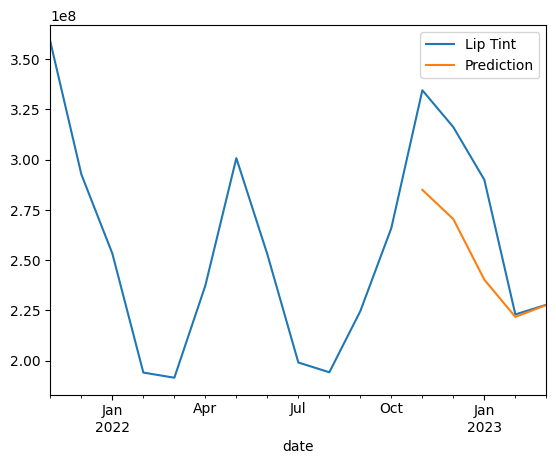

In [ ]:
pd.concat([df_forecast['Lip Tint'],forecast_df],axis=1).plot()

**Kita pindahkan forecast_df ke final tabel yang akan dipakai menguji mape antara nilai forecast dan nilai aktual dari periode data testing yang sudah kita tentukan**

In [ ]:
final_table = pd.concat([forecast_df, test['Lip Tint']], axis=1)
final_table

,Prediction,Lip Tint
date,,
2022-11-30,2.850044e+08,334581300.0
2022-12-31,2.704303e+08,316219000.0
2023-01-31,2.402708e+08,289994000.0
2023-02-28,2.217579e+08,222985450.0
2023-03-31,2.276808e+08,227787000.0


In [ ]:
# Menghitung nilai MAPE
mape = np.mean(np.abs((final_table['Lip Tint'] - final_table['Prediction']) / final_table['Lip Tint'])) * 100

# Menampilkan hasil evaluasi
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Percentage Error (MAPE): 9.408218481638622


In [ ]:
def evaluate_mape(mape):
    if mape < 10:
        return "Kemampuan peramalan sangat baik"
    elif mape < 20:
        return "Kemampuan peramalan baik"
    elif mape < 50:
        return "Kemampuan peramalan layak"
    else:
        return "Kemampuan peramalan buruk"

evaluation = evaluate_mape(mape)
print("Evaluasi MAPE:", evaluation)

Evaluasi MAPE: Kemampuan peramalan sangat baik


In [ ]:
from sklearn.metrics import mean_absolute_error

# Menghitung MAE antara nilai aktual dan nilai prediksi
mae = mean_absolute_error(final_table['Lip Tint'], final_table['Prediction'])

# Menampilkan hasil MAE
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 29284519.10405026


**Forecast Lip Tint**

<Axes: >

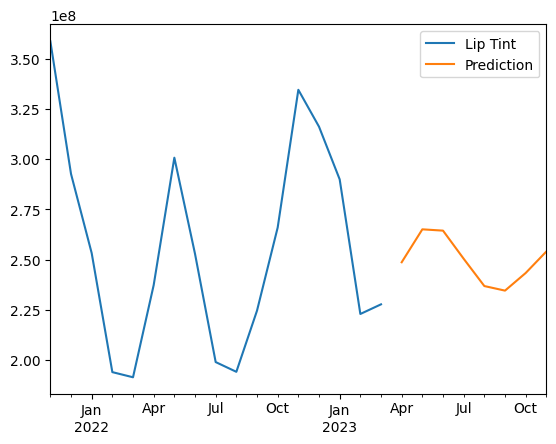

In [ ]:
forecast_fix=model.predict(n_periods=13, return_conf_int=True)
forecast_range = pd.date_range(start='2023-04-01', periods=8, freq='M')
forecast_fix_df = pd.DataFrame(forecast_fix[0],index =forecast_range,columns=['Prediction'])
pd.concat([df_forecast['Lip Tint'],forecast_fix_df],axis=1).plot()

# Kategori Foundation

In [ ]:
import pmdarima as pm

model = pm.auto_arima(df_forecast['Foundation'],
                        m=12, seasonal=False,
                      start_p=0, start_q=0, max_order=4, test='adf',error_action='ignore',
                           suppress_warnings=True,
                      stepwise=True, trace=True)

/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=700.285, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=661.574, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=691.690, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=661.818, Time=0.09 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=662.073, Time=0.14 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=663.861, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=657.767, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=661.124, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=652.436, Time=0.29 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=652.075, Time=0.30 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=651.884, Time=0.28 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.62 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=653.496, Time=1.05 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=651.720, Time=0.68 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=657.263, 

In [ ]:
model.fit(train['Foundation'])

ARIMA(order=(2, 0, 2), scoring_args={}, suppress_warnings=True)

In [ ]:
forecast_data_test

(2022-11-30    2.850044e+08
 2022-12-31    2.704303e+08
 2023-01-31    2.402708e+08
 2023-02-28    2.217579e+08
 2023-03-31    2.276808e+08
 Freq: M, dtype: float64,
 array([[2.39700145e+08, 3.30308657e+08],
        [2.06115887e+08, 3.34744747e+08],
        [1.75318720e+08, 3.05222897e+08],
        [1.51007234e+08, 2.92508519e+08],
        [1.48449822e+08, 3.06911681e+08]]))

In [ ]:
forecast_df = pd.DataFrame(forecast_data_test[0],index = test.index,columns=['Prediction'])

<Axes: xlabel='date'>

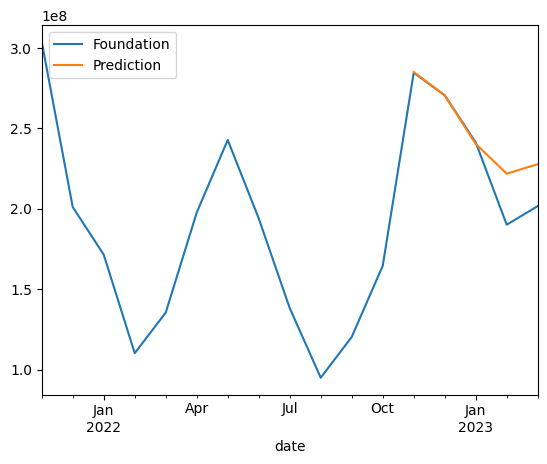

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
pd.concat([df_forecast['Foundation'],forecast_df],axis=1).plot()

In [ ]:
final_table = pd.concat([forecast_df, test['Foundation']], axis=1)
final_table

,Prediction,Foundation
date,,
2022-11-30,2.850044e+08,284546000.0
2022-12-31,2.704303e+08,270526000.0
2023-01-31,2.402708e+08,241218000.0
2023-02-28,2.217579e+08,190054300.0
2023-03-31,2.276808e+08,201595000.0


In [ ]:
final_table = pd.concat([forecast_df, test['Foundation']], axis=1)
final_table

# Menghitung nilai MAPE
mape = np.mean(np.abs((final_table['Foundation'] - final_table['Prediction']) / final_table['Foundation'])) * 100

# Menampilkan hasil evaluasi
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Percentage Error (MAPE): 6.042029210047345


In [ ]:
def evaluate_mape(mape):
    if mape < 10:
        return "Kemampuan peramalan sangat baik"
    elif mape < 20:
        return "Kemampuan peramalan baik"
    elif mape < 50:
        return "Kemampuan peramalan layak"
    else:
        return "Kemampuan peramalan buruk"

evaluation = evaluate_mape(mape)
print("Evaluasi MAPE:", evaluation)

Evaluasi MAPE: Kemampuan peramalan sangat baik


In [ ]:
from sklearn.metrics import mean_absolute_error

# Menghitung MAE antara nilai aktual dan nilai prediksi
mae = mean_absolute_error(final_table['Foundation'], final_table['Prediction'])

# Menampilkan hasil MAE
print("Mean Absolute Error (MAE):", mae)

# Menghitung MPE
prediksi = final_table['Prediction']
aktual = final_table['Foundation']

# Prediction	Lip Tint
mpe = np.mean((aktual - prediksi) / aktual) * 100

print("Mean Percentage Error (MPE):", mpe)

Mean Absolute Error (MAE): 11858120.746447284
Mean Percentage Error (MPE): -5.870813368588497


**Forecast Foundation**

<Axes: >

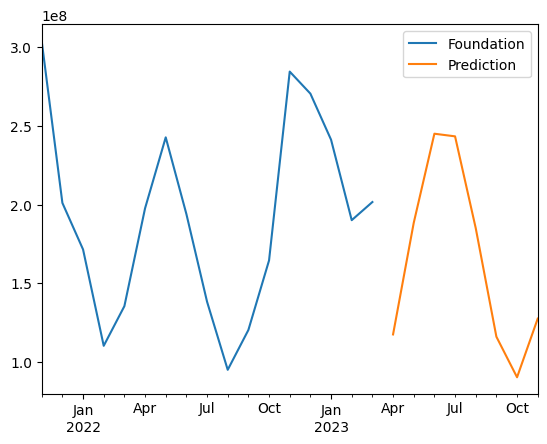

In [ ]:
forecast_fix=model.predict(n_periods=13, return_conf_int=True)
forecast_range=pd.date_range(start='2023-04-01', periods=8,freq='M')
forecast_fix_df = pd.DataFrame(forecast_fix[0],index =forecast_range,columns=['Prediction'])
pd.concat([df_forecast['Foundation'],forecast_fix_df],axis=1).plot()

# Kategori Lipstik

In [ ]:
import pmdarima as pm

model = pm.auto_arima(df_forecast['Lipstik'],
                        m=12, seasonal=False,
                      start_p=0, start_q=0, max_order=4, test='adf',error_action='ignore',
                           suppress_warnings=True,
                      stepwise=True, trace=True)

/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=691.746, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=658.177, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=683.089, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=658.983, Time=0.10 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=658.705, Time=0.17 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=660.735, Time=0.23 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=653.088, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=654.692, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=646.516, Time=0.09 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=642.664, Time=0.23 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=644.043, Time=0.18 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=644.241, Time=0.27 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=657.118, Time=0.40 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=646.055, Time=0.68 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=659.9

In [ ]:
model.fit(train['Lipstik'])

ARIMA(order=(3, 0, 0), scoring_args={}, suppress_warnings=True)

In [ ]:
# Kita coba prediksi 5 bulan kedepan supaya bisa dibandingkan dengan data tes
forecast_data_test=model.predict(n_periods=5, return_conf_int=True)
forecast_data_test

(2022-11-30    1.928398e+08
 2022-12-31    1.802341e+08
 2023-01-31    1.570816e+08
 2023-02-28    1.028660e+08
 2023-03-31    9.670990e+07
 Freq: M, dtype: float64,
 array([[1.58861443e+08, 2.26818123e+08],
        [1.44625678e+08, 2.15842502e+08],
        [1.21440025e+08, 1.92723091e+08],
        [5.87571029e+07, 1.46974845e+08],
        [4.96697136e+07, 1.43750087e+08]]))

In [ ]:
forecast_df = pd.DataFrame(forecast_data_test[0],index = test.index,columns=['Prediction'])

In [ ]:
final_table = pd.concat([forecast_df, test['Lipstik']], axis=1)
final_table

,Prediction,Lipstik
date,,
2022-11-30,1.928398e+08,234463000.0
2022-12-31,1.802341e+08,215255000.0
2023-01-31,1.570816e+08,154883000.0
2023-02-28,1.028660e+08,135347550.0
2023-03-31,9.670990e+07,135587000.0


<Axes: xlabel='date'>

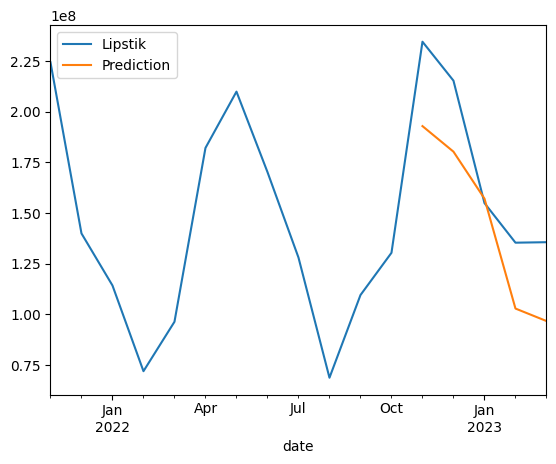

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
pd.concat([df_forecast['Lipstik'],forecast_df],axis=1).plot()

In [ ]:
final_table = pd.concat([forecast_df, test['Lipstik']], axis=1)
final_table

# Menghitung nilai MAPE
mape = np.mean(np.abs((final_table['Lipstik'] - final_table['Prediction']) / final_table['Lipstik'])) * 100

# Menampilkan hasil evaluasi
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Percentage Error (MAPE): 17.622677749315525


In [ ]:
def evaluate_mape(mape):
    if mape < 10:
        return "Kemampuan peramalan sangat baik"
    elif mape < 20:
        return "Kemampuan peramalan baik"
    elif mape < 50:
        return "Kemampuan peramalan layak"
    else:
        return "Kemampuan peramalan buruk"

evaluation = evaluate_mape(mape)
print("Evaluasi MAPE:", evaluation)

Evaluasi MAPE: Kemampuan peramalan baik


In [ ]:
from sklearn.metrics import mean_absolute_error

# Menghitung MAE antara nilai aktual dan nilai prediksi
mae = mean_absolute_error(final_table['Lipstik'], final_table['Prediction'])

# Menampilkan hasil MAE
print("Mean Absolute Error (MAE):", mae)

# Menghitung MPE
prediksi = final_table['Prediction']
aktual = final_table['Lipstik']

# Prediction	Lip Tint
mpe = np.mean((aktual - prediksi) / aktual) * 100

print("Mean Percentage Error (MPE):", mpe)

Mean Absolute Error (MAE): 30040272.188154757
Mean Percentage Error (MPE): 17.05487937934254


**Forecast Lipstik**

<Axes: >

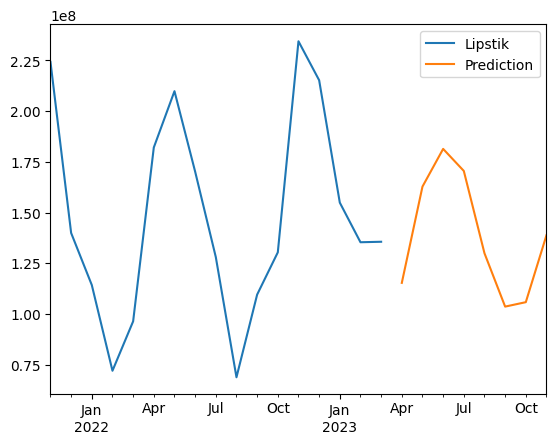

In [ ]:
forecast_fix=model.predict(n_periods=13, return_conf_int=True)
forecast_range=pd.date_range(start='2023-04-01', periods=8,freq='M')
forecast_fix_df = pd.DataFrame(forecast_fix[0],index =forecast_range,columns=['Prediction'])
pd.concat([df_forecast['Lipstik'],forecast_fix_df],axis=1).plot()

# Kategori Parfum & Wewangian

In [ ]:
import pmdarima as pm

model = pm.auto_arima(df_forecast['Parfum & Wewangian'],
                        m=12, seasonal=False,
                      start_p=0, start_q=0, max_order=4, test='adf',error_action='ignore',
                           suppress_warnings=True,
                      stepwise=True, trace=True)

/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=666.927, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=630.182, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=656.867, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=627.681, Time=0.09 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=615.616, Time=0.15 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=inf, Time=0.20 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=611.136, Time=0.21 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.25 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=602.607, Time=0.47 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=594.692, Time=0.53 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=inf, Time=0.44 sec
 ARIMA(5,0,2)(0,0,0)[0]             : AIC=596.621, Time=0.26 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=602.459, Time=0.25 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=588.866, Time=0.33 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=596.545, Time=0.2

In [ ]:
model.fit(train['Parfum & Wewangian'])

ARIMA(order=(5, 0, 1), scoring_args={}, suppress_warnings=True)

In [ ]:
# Kita coba prediksi 5 bulan kedepan supaya bisa dibandingkan dengan data tes
forecast_data_test=model.predict(n_periods=5, return_conf_int=True)
forecast_data_test

(2022-11-30    3.147578e+07
 2022-12-31    4.874306e+07
 2023-01-31    8.120500e+07
 2023-02-28    1.032580e+08
 2023-03-31    9.598629e+07
 Freq: M, dtype: float64,
 array([[2.66465399e+07, 3.63050290e+07],
        [4.28492231e+07, 5.46369013e+07],
        [7.52492637e+07, 8.71607326e+07],
        [9.68027541e+07, 1.09713242e+08],
        [8.83275330e+07, 1.03645049e+08]]))

In [ ]:
forecast_df = pd.DataFrame(forecast_data_test[0],index = test.index,columns=['Prediction'])
forecast_df

,Prediction
date,
2022-11-30,3.147578e+07
2022-12-31,4.874306e+07
2023-01-31,8.120500e+07
2023-02-28,1.032580e+08
2023-03-31,9.598629e+07


<Axes: xlabel='date'>

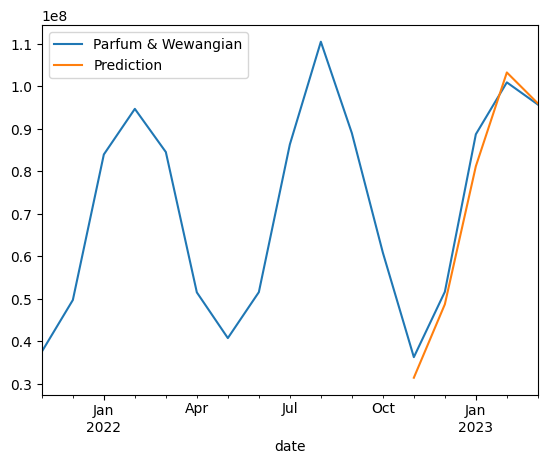

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
pd.concat([df_forecast['Parfum & Wewangian'],forecast_df],axis=1).plot()

In [ ]:
final_table = pd.concat([forecast_df, test['Parfum & Wewangian']], axis=1)
final_table

,Prediction,Parfum & Wewangian
date,,
2022-11-30,3.147578e+07,36315000.0
2022-12-31,4.874306e+07,51675000.0
2023-01-31,8.120500e+07,88722000.0
2023-02-28,1.032580e+08,100925000.0
2023-03-31,9.598629e+07,95719000.0


In [ ]:
# Menghitung nilai MAPE
mape = np.mean(np.abs((final_table['Parfum & Wewangian'] - final_table['Prediction']) / final_table['Parfum & Wewangian'])) * 100

# Menampilkan hasil evaluasi
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Percentage Error (MAPE): 6.012572947080084


In [ ]:
from sklearn.metrics import mean_absolute_error

# Menghitung MAE antara nilai aktual dan nilai prediksi
mae = mean_absolute_error(final_table['Parfum & Wewangian'], final_table['Prediction'])

# Menampilkan hasil MAE
print("Mean Absolute Error (MAE):", mae)

# Menghitung MPE
prediksi = final_table['Prediction']
aktual = final_table['Parfum & Wewangian']

# Prediction	Lip Tint
mpe = np.mean((aktual - prediksi) / aktual) * 100

print("Mean Percentage Error (MPE):", mpe)

Mean Absolute Error (MAE): 3577688.9117510663
Mean Percentage Error (MPE): 4.9762283879502345


In [ ]:
def evaluate_mape(mape):
    if mape < 10:
        return "Kemampuan peramalan sangat baik"
    elif mape < 20:
        return "Kemampuan peramalan baik"
    elif mape < 50:
        return "Kemampuan peramalan layak"
    else:
        return "Kemampuan peramalan buruk"

evaluation = evaluate_mape(mape)
print("Evaluasi MAPE:", evaluation)

Evaluasi MAPE: Kemampuan peramalan sangat baik


**Forecast Parfum Wewangian**

<Axes: >

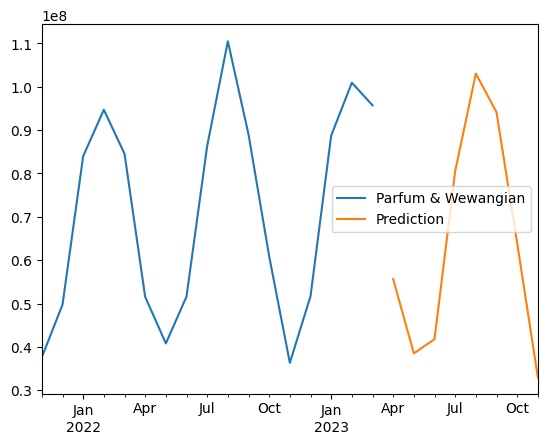

In [ ]:
forecast_fix=model.predict(n_periods=13, return_conf_int=True)
forecast_range=pd.date_range(start='2023-04-01', periods=8,freq='M')
forecast_fix_df = pd.DataFrame(forecast_fix[0],index =forecast_range,columns=['Prediction'])
pd.concat([df_forecast['Parfum & Wewangian'],forecast_fix_df],axis=1).plot()

# Kategori Pelembab Wajah

In [ ]:
import pmdarima as pm

model = pm.auto_arima(df_forecast['Pelembab Wajah'],
                        m=12, seasonal=False,
                      start_p=0, start_q=0, max_order=4, test='adf',error_action='ignore',
                           suppress_warnings=True,
                      stepwise=True, trace=True)

/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=669.015, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=647.159, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=660.016, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=648.235, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=647.874, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.13 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=643.681, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=644.308, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=637.765, Time=0.04 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=636.189, Time=0.09 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=637.074, Time=0.08 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=636.516, Time=0.20 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=644.855, Time=0.08 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=638.487, Time=0.28 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=648.916, 

In [ ]:
model.fit(train['Pelembab Wajah'])

ARIMA(order=(3, 0, 0), scoring_args={}, suppress_warnings=True)

In [ ]:
# Kita coba prediksi 5 bulan kedepan supaya bisa dibandingkan dengan data tes
forecast_data_test=model.predict(n_periods=5, return_conf_int=True)
forecast_data_test

(2022-11-30    9.675820e+07
 2022-12-31    8.436238e+07
 2023-01-31    6.100461e+07
 2023-02-28    4.098990e+07
 2023-03-31    4.547277e+07
 Freq: M, dtype: float64,
 array([[7.06658342e+07, 1.22850574e+08],
        [5.64150045e+07, 1.12309752e+08],
        [3.30326716e+07, 8.89765476e+07],
        [7.43820604e+06, 7.45415929e+07],
        [9.46048830e+06, 8.14850512e+07]]))

In [ ]:
forecast_df = pd.DataFrame(forecast_data_test[0],index = test.index,columns=['Prediction'])

<Axes: xlabel='date'>

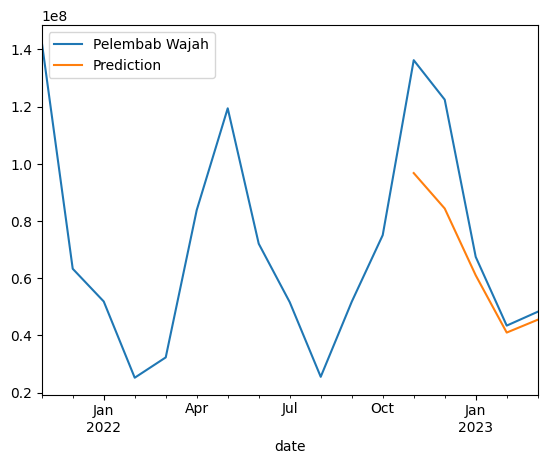

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
pd.concat([df_forecast['Pelembab Wajah'],forecast_df],axis=1).plot()

In [ ]:
final_table = pd.concat([forecast_df, test['Pelembab Wajah']], axis=1)
final_table

,Prediction,Pelembab Wajah
date,,
2022-11-30,9.675820e+07,136230000.0
2022-12-31,8.436238e+07,122430000.0
2023-01-31,6.100461e+07,67450000.0
2023-02-28,4.098990e+07,43423000.0
2023-03-31,4.547277e+07,48265000.0


In [ ]:
# Menghitung nilai MAPE
mape = np.mean(np.abs((final_table['Pelembab Wajah'] - final_table['Prediction']) / final_table['Pelembab Wajah'])) * 100

# Menampilkan hasil evaluasi
print("Mean Absolute Percentage Error (MAPE):", mape)

def evaluate_mape(mape):
    if mape < 10:
        return "Kemampuan peramalan sangat baik"
    elif mape < 20:
        return "Kemampuan peramalan baik"
    elif mape < 50:
        return "Kemampuan peramalan layak"
    else:
        return "Kemampuan peramalan buruk"

evaluation = evaluate_mape(mape)
print("Evaluasi MAPE:", evaluation)

Mean Absolute Percentage Error (MAPE): 16.202404117785246
Evaluasi MAPE: Kemampuan peramalan baik


In [ ]:
from sklearn.metrics import mean_absolute_error

# Menghitung MAE antara nilai aktual dan nilai prediksi
mae = mean_absolute_error(final_table['Pelembab Wajah'], final_table['Prediction'])

# Menampilkan hasil MAE
print("Mean Absolute Error (MAE):", mae)

# Menghitung MPE
prediksi = final_table['Prediction']
aktual = final_table['Pelembab Wajah']

# Prediction	Lip Tint
mpe = np.mean((aktual - prediksi) / aktual) * 100

print("Mean Percentage Error (MPE):", mpe)

Mean Absolute Error (MAE): 17842027.7083304
Mean Percentage Error (MPE): 16.202404117785246


**Forecast Pelembab Wajah**

<Axes: >

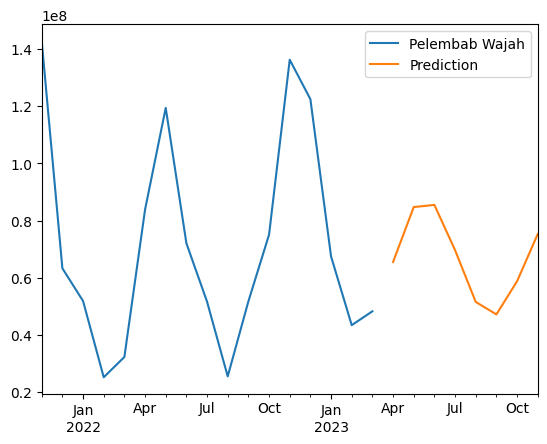

In [ ]:
forecast_fix=model.predict(n_periods=13, return_conf_int=True)
forecast_range=pd.date_range(start='2023-04-01', periods=8,freq='M')
forecast_fix_df = pd.DataFrame(forecast_fix[0],index =forecast_range,columns=['Prediction'])
pd.concat([df_forecast['Pelembab Wajah'],forecast_fix_df],axis=1).plot()